In [1]:
import lib
import numpy as np
import pywt
H_h = np.array([1, -1])/np.sqrt(2)
H_l = np.array([1, 1])/np.sqrt(2)
G_l = H_l
G_h = -H_h

In [2]:
exmpl = np.array(([[5, 7, 5, 4, 6, 0, 0, 6],
       [5, 4, 9, 3, 6, 9, 7, 0],
       [4, 1, 1, 5, 8, 0, 5, 7],
       [1, 8, 9, 2, 4, 4, 9, 9],
       [0, 4, 3, 2, 7, 1, 0, 4],
       [3, 7, 7, 7, 1, 9, 0, 3],
       [9, 5, 3, 9, 8, 7, 5, 9],
       [2, 0, 7, 6, 2, 8, 8, 2]]))

In [3]:
exmpl

array([[5, 7, 5, 4, 6, 0, 0, 6],
       [5, 4, 9, 3, 6, 9, 7, 0],
       [4, 1, 1, 5, 8, 0, 5, 7],
       [1, 8, 9, 2, 4, 4, 9, 9],
       [0, 4, 3, 2, 7, 1, 0, 4],
       [3, 7, 7, 7, 1, 9, 0, 3],
       [9, 5, 3, 9, 8, 7, 5, 9],
       [2, 0, 7, 6, 2, 8, 8, 2]])

In [4]:
X, Y = lib.fried_model_gradient(exmpl)

In [5]:
def GetH_l(pow_):
    res = np.zeros(pow_ + 1)
    res[0] = res[-1] = 1
    return res / np.sqrt(2)

In [6]:
def GetH_h(pow_):
    res = np.zeros(pow_ + 1)
    res[0] = 1
    res[-1] = -1
    return res / np.sqrt(2)

In [7]:
def GetLH(m, Y):
    coef = np.power(np.sqrt(2), (m - 1))
    tmp = Y
    for i  in range (1, m):
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'horizontal')
    for i in range (m - 1):
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'vertical')
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'vertical')
    return coef * lib.down_sample(tmp, 2 ** m)

In [8]:
def GetHL(m, X):
    coef = np.power(np.sqrt(2), (m - 1))
    tmp = X
    for i in range (m - 1):
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'horizontal')
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'horizontal')
    for i  in range (1, m):
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'vertical') 
    return coef * lib.down_sample(tmp, 2 ** m)

In [9]:
def GetHHleft(m, X):
    coef = np.power(np.sqrt(2), (m - 1))
    tmp = X
    for i in range (m - 1):
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'horizontal')
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'horizontal')
    tmp = lib.convolve_2d(tmp, GetH_h(2 ** m - 1), 'vertical')
    for i  in range (1, m - 1):
        tmp = lib.convolve_2d(tmp, GetH_l(2 ** i), 'vertical') 
    return coef * lib.down_sample(tmp, 2 ** m)

In [10]:
def get_HH(X_H, Y_H):#works
    coef = np.sqrt(2) * 0.25
    tmp1 = lib.convolve_2d(X_H, H_h, 'vertical')
    tmp2 = lib.convolve_2d(Y_H, H_h, 'horizontal')
    return lib.down_sample(tmp1 + tmp2,2) * coef

# матрица 8 $\times$ 8

In [11]:
exmpl

array([[5, 7, 5, 4, 6, 0, 0, 6],
       [5, 4, 9, 3, 6, 9, 7, 0],
       [4, 1, 1, 5, 8, 0, 5, 7],
       [1, 8, 9, 2, 4, 4, 9, 9],
       [0, 4, 3, 2, 7, 1, 0, 4],
       [3, 7, 7, 7, 1, 9, 0, 3],
       [9, 5, 3, 9, 8, 7, 5, 9],
       [2, 0, 7, 6, 2, 8, 8, 2]])

# Модель Hudgin - а

In [12]:
def Hudgin_gradien_model(image):#работает
    X = np.sqrt(2) * lib.convolve_2d(image, H_h, 'horizontal')
    Y = np.sqrt(2) * lib.convolve_2d(image, H_h, 'vertical')
    return X, Y
X_H, Y_H = Hudgin_gradien_model(exmpl)

# Модель Fried - a

In [13]:
X, Y = lib.fried_model_gradient(exmpl)

In [14]:
#Разрешение
M = int(np.log2(len(X)))

# Анализ

In [15]:
LH = dict()
HL = dict()
HH = dict()
LL = dict()
LL[0] = np.array([[np.mean(exmpl) * (2 ** M)]])

In [16]:
HH[M - 1] = get_HH(X_H, Y_H).T
HL[M - 1] = -lib.down_sample(X, 2).T
LH[M - 1] = -lib.down_sample(Y, 2).T

In [17]:
for k in range(M - 1):
    LH[k] = -GetLH(M - k, Y).T
    HL[k] = -GetHL(M - k, X).T
    if (k != M - 1):
        HH[k] = GetHHleft(M - k, X).T
#HH[0] = np.array([[-0.875]])

# Синтез

In [18]:
pywt.dwt2(pywt.dwt2(pywt.dwt2(exmpl, 'haar')[0], 'haar')[0],'haar')

(array([[ 37.625]]), (array([[ 0.625]]), array([[-0.875]]), array([[-0.875]])))

In [19]:
for k in range(M):
    LL[k + 1] = pywt.idwt2([LL[k],(LH[k], HL[k], HH[k])], 'haar')

In [20]:
lib.mean_squared_error(LL[3], exmpl)

0.073486328124999861

вышло не очень точно

# Теперь изображение

In [45]:
import scipy.misc
%matplotlib inline
import matplotlib.pyplot as plt
image = scipy.misc.imread("image.jpg",mode='L')
print(image)

[[ 5  5  5 ...,  7  7  7]
 [ 3  4  4 ...,  7  7  7]
 [ 3  3  3 ...,  7  7  7]
 ..., 
 [ 2  2  2 ...,  9  9  9]
 [ 2  2  2 ..., 10 10 10]
 [ 2  2  2 ..., 10 10 10]]


In [46]:
X_im, Y_im = lib.fried_model_gradient(image)

In [23]:
def analyze(gradX, gradY):
    M = int(np.log2(len(gradX)))
    LH = dict()
    HL = dict()
    HH = dict()
    X_H, Y_H = lib.Hudgin_gradien_model(image)
    HH[M - 1] = get_HH(X_H, Y_H).T
    HL[M - 1] = -lib.down_sample(gradX, 2).T
    LH[M - 1] = -lib.down_sample(gradY, 2).T
    for k in range(M - 1):
        LH[k] = -GetLH(M - k, gradY).T
        HL[k] = -GetHL(M - k, gradX).T
        if (k != M - 1):
            HH[k] = GetHHleft(M - k, gradX).T
    return LH, HL, HH

In [24]:
LH, HL, HH = analyze(X_im, Y_im)

долго работало

In [36]:
LL = dict()
LL[0] = np.array([[np.mean(image) * 1024]])

In [37]:
def syntesis(LL,LH, HL, HH, M):
    for k in range(M):
        LL[k + 1] = pywt.idwt2([LL[k],(LH[k], HL[k], HH[k])], 'haar')
    return LL

In [47]:
LL = syntesis(LL,LH, HL, HH, 10)

In [49]:
LL[9]

array([[  4.78621674,   4.78621674,   5.47371674, ...,   9.92900085,
          9.92900085,   9.92900085],
       [  1.78621674,   2.28621674,   4.47371674, ...,   9.92900085,
          9.92900085,   9.92900085],
       [  2.47371674,   4.47371674,   3.91121674, ...,   9.92900085,
          9.92900085,   9.92900085],
       ..., 
       [  8.38874054,   8.38874054,   8.38874054, ...,  30.36471558,
         30.36471558,  30.36471558],
       [  8.38874054,   8.38874054,   8.38874054, ...,  32.36471558,
         32.36471558,  32.36471558],
       [  8.38874054,   8.38874054,   8.38874054, ...,  35.36471558,
         35.36471558,  35.36471558]])

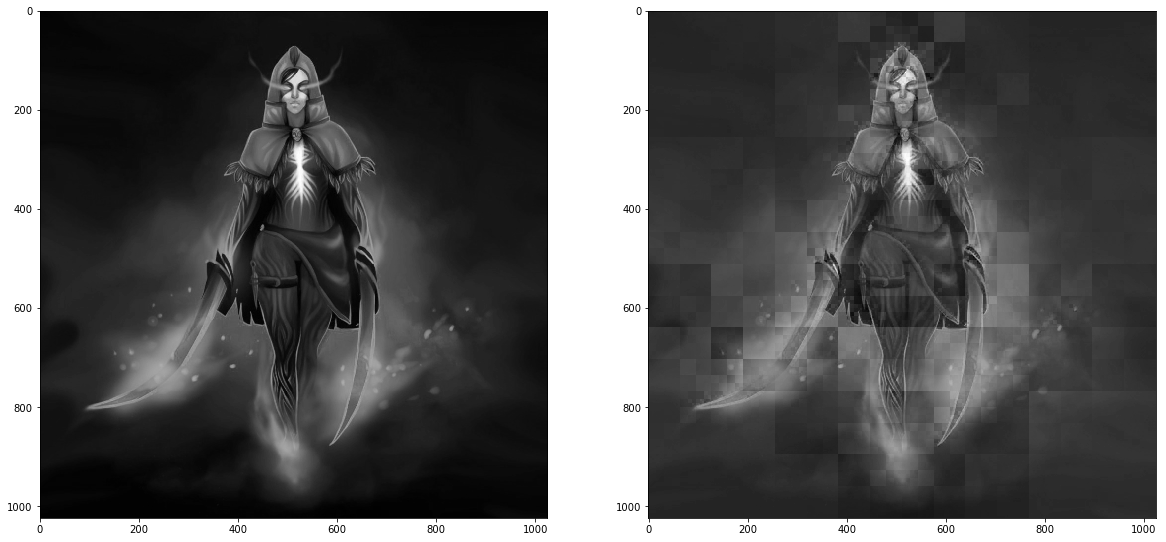

In [59]:
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].imshow(image, cmap="gray")
axarr[1].imshow(LL[10], cmap="gray")

In [62]:
lib.mean_squared_error(LL[10], image)

122.72803825817357

HH квадрант не точно считается почему-то
думаю тут проблема в неточных вычислениях

алгоритм который был приведен в статье 2008 года не работал у меня.
я делал все по псевдокоду, но следующие X, Y считались неправильно.
в итоге я сделал расчет влоб без буферных переменных.